In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Startup.csv')
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [3]:
X = df.drop(columns='Profit')
y = df['Profit']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2score = r2_score(y_test, y_pred)
ad_r2score = 1-(1-r2score)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2_score: ', r2score)
print('Adjusted_R2_score: ', ad_r2score)

MAE:  8009.531638152185
MSE:  134557225.16210577
RMSE:  11599.880394301736
R2_score:  0.9310040943851832
Adjusted_R2_score:  0.9121870292175058


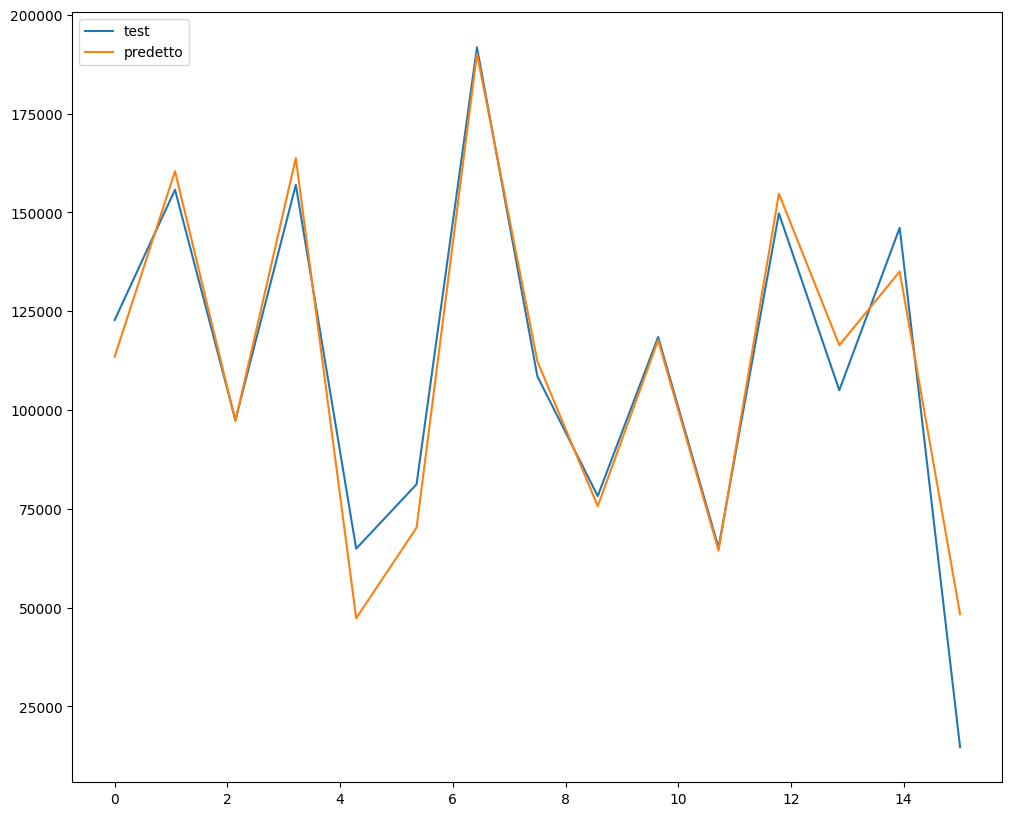

In [12]:
length = y_pred.shape[0]  
x = np.linspace(0,length,length)


plt.figure(figsize=(12,10))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2)

In [13]:
import joblib

joblib.dump(model,'company.pkl')

['company.pkl']

In [14]:
newmodel = joblib.load('company.pkl')
newmodel

LinearRegression()

In [16]:
newmodel.predict([[165349.20,136897.80,471784.10]])[0]

193618.43840683944